# **Analysis 2: Map of Police Department Incident Reports Dataset**

## **Data Assembly**

So far, I’ve analyzed hate crime reports in San Francisco, looking at who is being targeted and where these incidents happen. To get a bigger picture of crime trends in the city, I expanded the analysis to include assault incidents using the Map of Police Department Incident Reports (2018 - Present) dataset. This helps identify locations where violent crimes commonly occur, giving insight into where potential hate crimes might also be more likely.

**Important Note:** This dataset does not label incidents as 'hate crimes', so I am using assault cases as a way to explore which areas may be higher risk for targeted violence.

DataSF - Open Data Portal. Map of Police Department incident reports: 2018 to present. https://data.sfgov.org/Public-Safety/Map-of-Police-Department-Incident-Reports-2018-to-/jq29-s5wp

## **Importing the Dataset**
To start working with the data, I used pandas to load the CSV file into a DataFrame, making it easier to clean and analyze. Below is the code that imports the necessary libraries and reads the dataset into a structured format:

In [ ]:
import pandas as pd  # Import pandas library
import matplotlib.pyplot as plt  # Import matplotlib for visualization

# Load the CSV file into a DataFrame from the URL
url = "https://raw.githubusercontent.com/jcsibajam/projects/refs/heads/main/Police_Incident_Reports.csv"
df = pd.read_csv(url)

## **Understanding the Dataset**

To get a better understanding of the dataset, I first printed the column names to see what kind of information was available. I also reviewed the dataset documentation from DataSF to understand how each variable is defined. This step helped me identify the most relevant columns for my analysis.

The dataset includes a wide range of details about each incident report, but I focused on the following key variables:


*   **Incident ID:** This is the system generated identifier for incident reports.
*   **Incident Year:** The year the incident occurred.
*   **Incident Category:** A category mapped on to the Incident Code used in statistics and reporting. Mappings provided by the Crime Analysis Unit of the Police Department.
*   **Intersection:** The 2 or more street names that intersect closest to the original incident separated by a backward slash. The possible intersections will only include those that satisfy the privacy controls.

In [ ]:
# Display column names
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District',
       'Supervisor District 2012', 'Latitude', 'Longitude', 'Point'],
      dtype='object')


## **Analyzing the Dataset**

The code below helps analyze assault incidents in San Francisco by filtering, counting, and visualizing the data. Here’s a step-by-step of the process:

**Filter the dataset to keep only assault cases:** This step removes all other crime categories and keeps only rows where 'Incident Category' is 'Assault'.

**Count the total number of reported assaults:** Each crime report has a unique 'Incident ID', so counting these IDs tells us how many assault cases are in the dataset.

incident_count = assault_df['Incident ID'].count()

**Break down assault cases by year:** To see how assault incidents have changed over time, I grouped the data by year and counted how many cases were reported each year.

incident_counts_by_year = assault_df.groupby('Incident Year')['Incident ID'].count()

**Print the yearly breakdown and create a bar chart to visualize the trends**


Number of 'Assault' Incidents by Year:
Incident Year
2020    6892
2021    7713
2022    8561
2023    8588
2024    8145
Name: Incident ID, dtype: int64


<Axes: xlabel='Incident Year'>

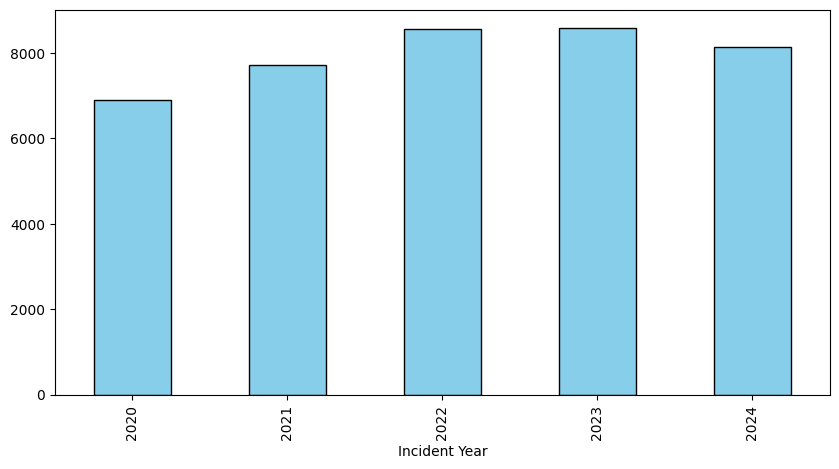

In [ ]:
# Filter the DataFrame where 'Incident Category' is 'Assault'
assault_df = df[df['Incident Category'] == 'Assault']

# Count the number of incidents by counting 'Incident ID'
incident_count = assault_df['Incident ID'].count()

# Group by 'Incident Year' and count the number of 'Incident ID'
incident_counts_by_year = assault_df.groupby('Incident Year')['Incident ID'].count()

# Print the grouped data
print("\nNumber of 'Assault' Incidents by Year:")
print(incident_counts_by_year)

# Create a bar chart for incident counts by year
plt.figure(figsize=(10, 5))
incident_counts_by_year.plot(kind='bar', color='skyblue', edgecolor='black')

## **Interpreting the Results**


*   The numbers are fairly consistent from 2021 onward, hovering between 7,713 and 8,588 incidents per year.
*   2022 saw the most reported assaults (8,561), followed closely by 2023 (8,588).
*   The increase from 2020 to 2021 (from 6,892 to 7,713 incidents) might be linked to the post-pandemic reopening, as more people returned to public spaces.

## **Connecting this to hate crimes**

*   The fact that 2021 had the highest hate crime numbers but not the highest assault numbers suggests that hate crimes were increasing for different reasons.
*   This supports the idea that certain communities (Asian individuals, LGBTQ+ people) were being specifically targeted, rather than being affected by general crime trends.

## **Where do most assaults happen in San Francisco?**

I analyzed assault incidents by intersection in San Francisco. Since assault is one of the most common violent crimes, identifying high-risk intersections can help us determine if there are specific areas where people are more likely to experience a hate crime. This is the process I followed:

*   **Count assaults at each intersection:** The dataset includes a column for 'Intersection', which tells us where each reported assault happened. I grouped the data by intersection and counted the number of 'Incident ID' records to see how many assaults were reported at each location.

*intersection_counts = assault_df.groupby('Intersection')['Incident ID'].count()*

*   **Find the most dangerous intersection:** The intersection with the highest number of assault reports was identified using idxmax() (which finds the location with the most incidents).

*   **Sort and display the top 10 high-crime intersections:**To get a clearer picture of where assaults happen most frequently, I sorted the intersections from highest to lowest and focused on the top 10.

*intersection_counts_sorted = intersection_counts.sort_values(ascending=False).head(10)*

*   **Visualizing the data:** I created a bar chart showing the 10 intersections with the most reported assaults.


Intersection with the most 'Assault' incidents: 24TH ST \ OSAGE ALY (270 incidents)


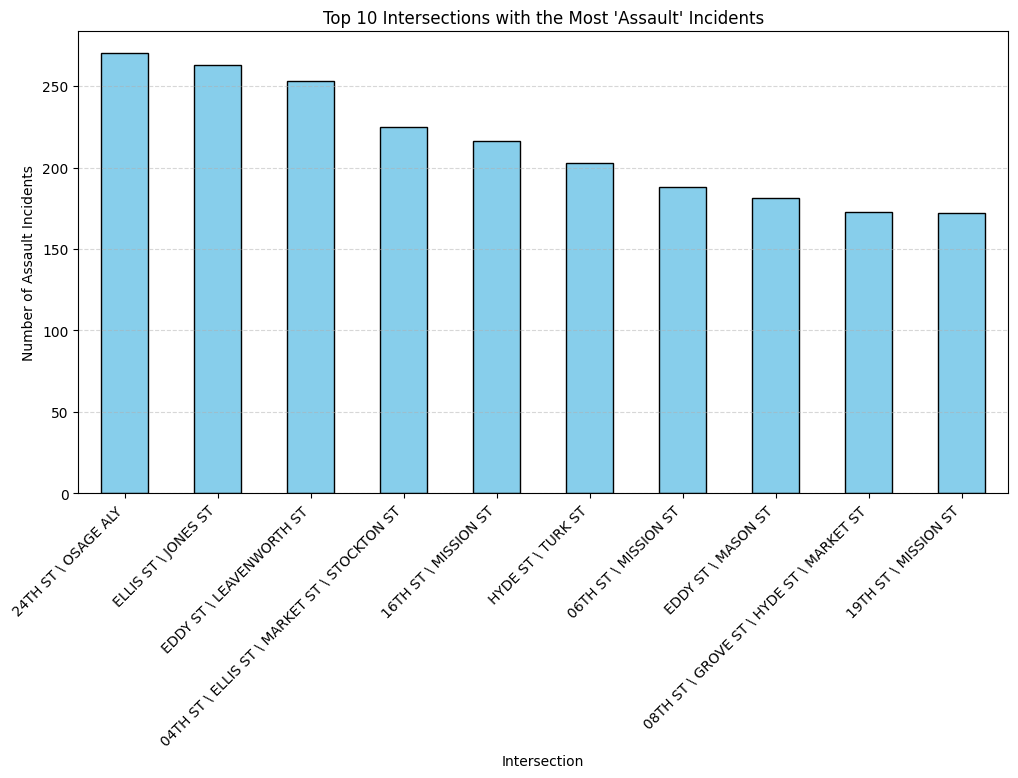

In [ ]:
# Count incidents at each intersection using 'Incident ID'
intersection_counts = assault_df.groupby('Intersection')['Incident ID'].count()

# Find the intersection with the most incidents
most_common_intersection = intersection_counts.idxmax()
most_common_intersection_count = intersection_counts.max()

print(f"\nIntersection with the most 'Assault' incidents: {most_common_intersection} ({most_common_intersection_count} incidents)")

# Sort the intersections by the number of incidents (descending order)
intersection_counts_sorted = intersection_counts.sort_values(ascending=False).head(10)  # Show top 10 intersections

# Create a bar chart for the number of 'Assault' incidents by intersection
plt.figure(figsize=(12, 6))
intersection_counts_sorted.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the bar chart
plt.xlabel("Intersection")
plt.ylabel("Number of Assault Incidents")
plt.title("Top 10 Intersections with the Most 'Assault' Incidents")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show the bar chart
plt.show()

## **Interpreting the Results**

*   24th St & Osage Aly (**270 incidents**) is the most dangerous intersection for assaults.
*   **Mission Street, Market Street, and Tenderloin appear frequently:** These areas are known for having higher crime rates due to social and economic factors, which could explain why violence is more common there.

## **Connecting this to hate crimes**

*   If hate crimes occur at these same intersections, it could mean that certain communities are simply more exposed to violence because they live or travel through high-crime areas.
*   If hate crimes are happening in different locations than these high-assault intersections, then it means that certain groups (such as Asian individuals and LGBTQ+ individuals) are being attacked in specific spaces, separate from general violent crime trends.

## **Next Steps for research**

Compare These High-Assault Intersections to Hate Crime Locations: Do the most violent intersections also have the most hate crimes, or are hate crimes happening elsewhere?
